In [1]:
from __future__ import print_function
import argparse
import torch
import torch.utils.data
from torch import nn, optim
from torch.nn import functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
from read_data import read_data
from ggplot import ggplot, aes, geom_point, ggtitle
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from IPython.display import Image


class VAE(nn.Module):
    def __init__(self):
        super(VAE, self).__init__()
        self.input_size  = 784
        self.encoding_vector_size  = 2

        self.fc1 = nn.Linear(self.input_size, 400)
        self.fc21 = nn.Linear(400, self.encoding_vector_size)
        self.fc22 = nn.Linear(400, self.encoding_vector_size)
        self.fc3 = nn.Linear(self.encoding_vector_size, 400)
        self.fc4 = nn.Linear(400, self.input_size)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        return self.fc21(h1), self.fc22(h1)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 784))
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar, z


/Users/gunesyurdakul/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)
/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/gunesyurdakul/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.ts

In [2]:
def decode_given_z(z,name,nrow):
    with torch.no_grad():
        sample = z.to(device)
        sample = model.decode(sample).cpu()
        save_image(sample.view(len(z), 1, 28, 28),'results/fashion-mnist/savedmodel_sample_'+name+'.png',nrow=nrow)

In [97]:
indexes=[]
for i in np.arange(-4,4,0.5):
    for j in np.arange(-4,4,0.5):
        indexes.append([float(i),float(j)])

***
### No missing label

In [92]:
model = VAE()
model.load_state_dict(torch.load('model_normal.pt'))
device = torch.device("cpu")

In [98]:
decode_given_z(torch.tensor(indexes),'normal',int(np.sqrt(len(indexes))))

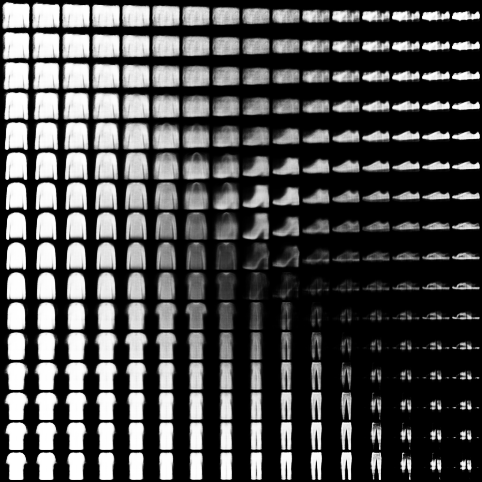

In [99]:
Image(filename='results/fashion-mnist/savedmodel_sample_normal.png') 

***
### TROUSERS MISSING

In [11]:
model = VAE()
model.load_state_dict(torch.load('model_missing_label_1.pt'))
device = torch.device("cpu")


In [90]:
decode_given_z(torch.tensor(indexes),'matrix',int(np.sqrt(len(indexes))))

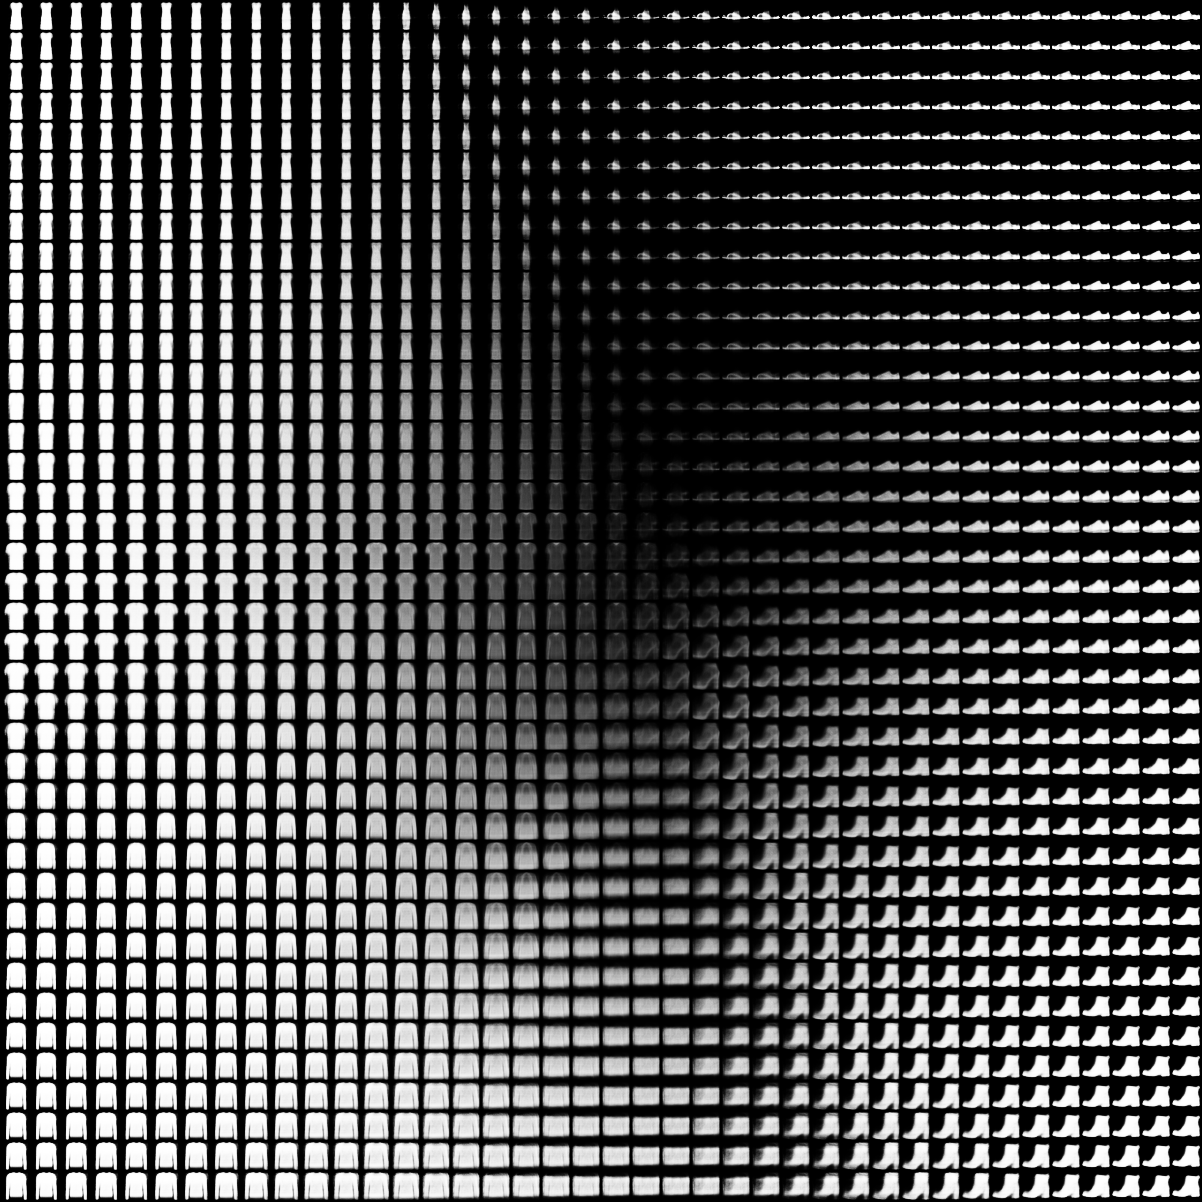

In [91]:
Image(filename='results/fashion-mnist/savedmodel_sample_matrix.png') 

***
### TROUSERS ONE SHOT SETTING

In [3]:
model = VAE()
model.load_state_dict(torch.load('model_trousers_oneshot_missing.pt'))
device = torch.device("cpu")


In [4]:
indexes=[]
for i in np.arange(-4,4,0.2):
    for j in np.arange(-4,4,0.2):
        indexes.append([float(i),float(j)])

In [5]:
decode_given_z(torch.tensor(indexes),'trousers-oneshot',int(np.sqrt(len(indexes))))

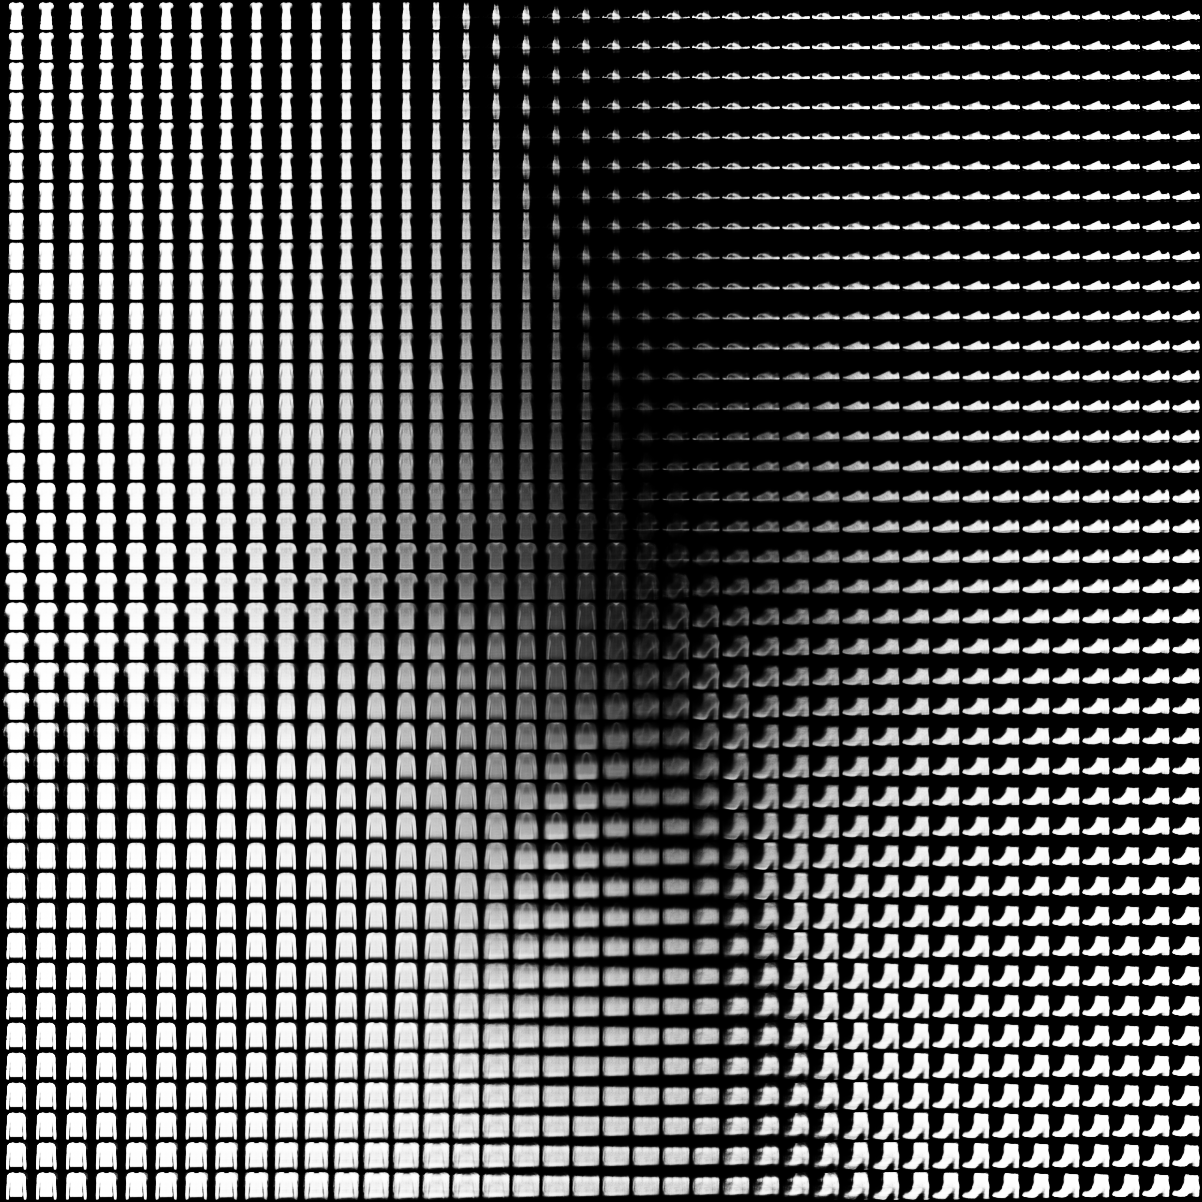

In [6]:
Image(filename='results/fashion-mnist/savedmodel_sample_trousers-oneshot.png') 

***
### TROUSERS FEW SHOT SETTING

In [7]:
model = VAE()
model.load_state_dict(torch.load('model_trousers_fewshot_missing.pt'))
device = torch.device("cpu")

In [8]:
indexes=[]
for i in np.arange(-4,4,0.2):
    for j in np.arange(-4,4,0.2):
        indexes.append([float(i),float(j)])

In [11]:
decode_given_z(torch.tensor(indexes),'trousers-fewshot',int(np.sqrt(len(indexes))))

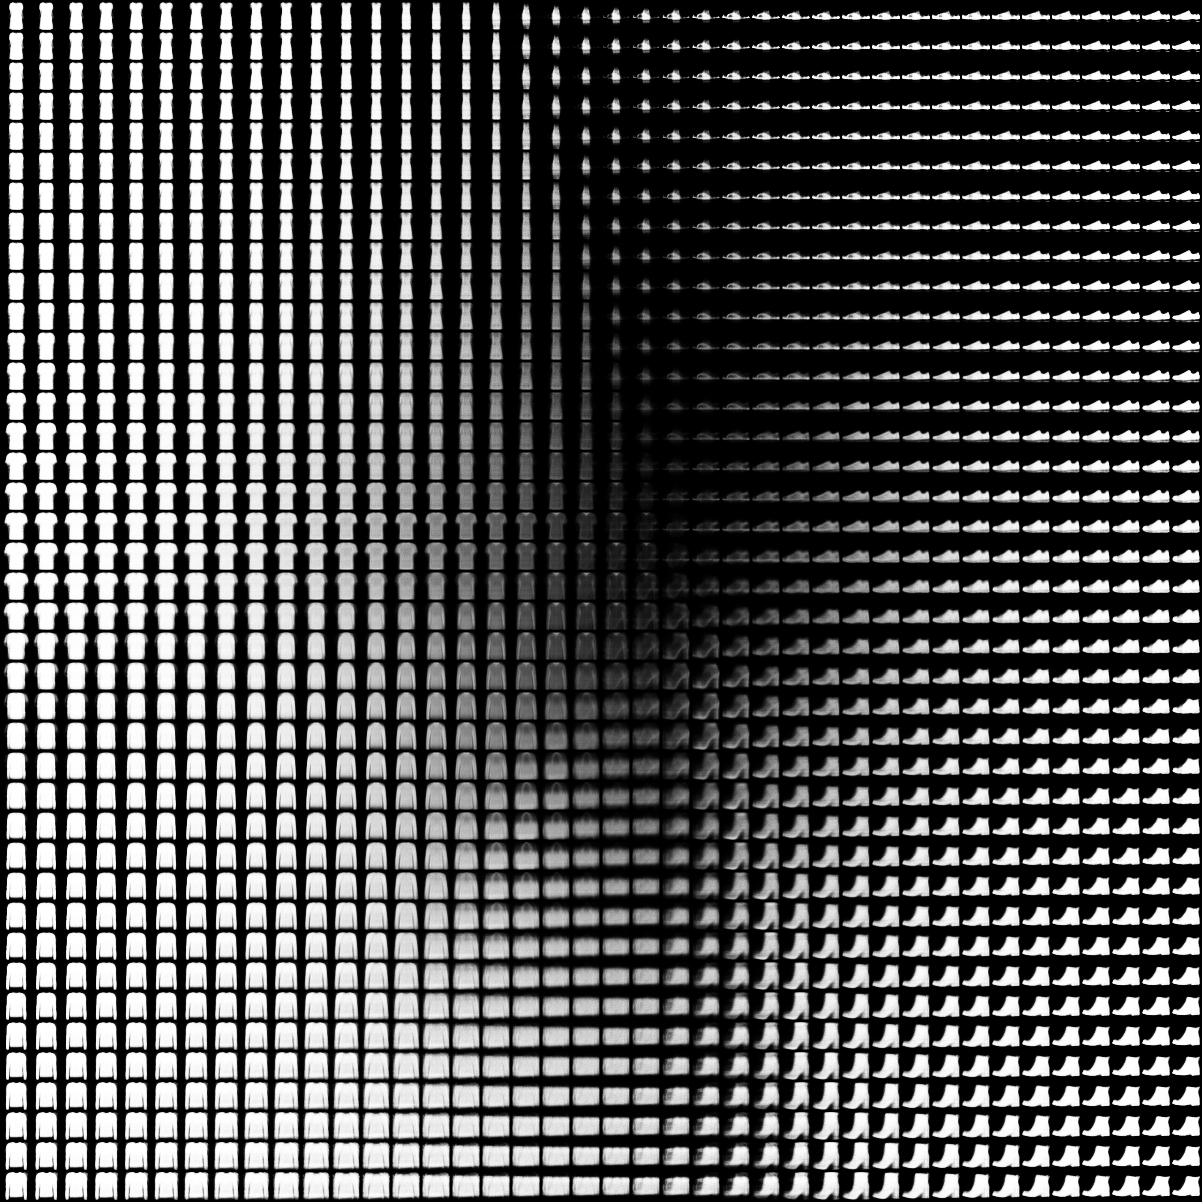

In [12]:
Image(filename='results/fashion-mnist/savedmodel_sample_trousers-fewshot.png') 

***
### SNEAKERS MISSING

In [107]:
model = VAE()
model.load_state_dict(torch.load('model_sneakers_missing.pt'))
device = torch.device("cpu")

In [110]:
indexes=[]
for i in np.arange(-4,4,0.2):
    for j in np.arange(-4,4,0.2):
        indexes.append([float(i),float(j)])

In [111]:
decode_given_z(torch.tensor(indexes),'sneakers',int(np.sqrt(len(indexes))))

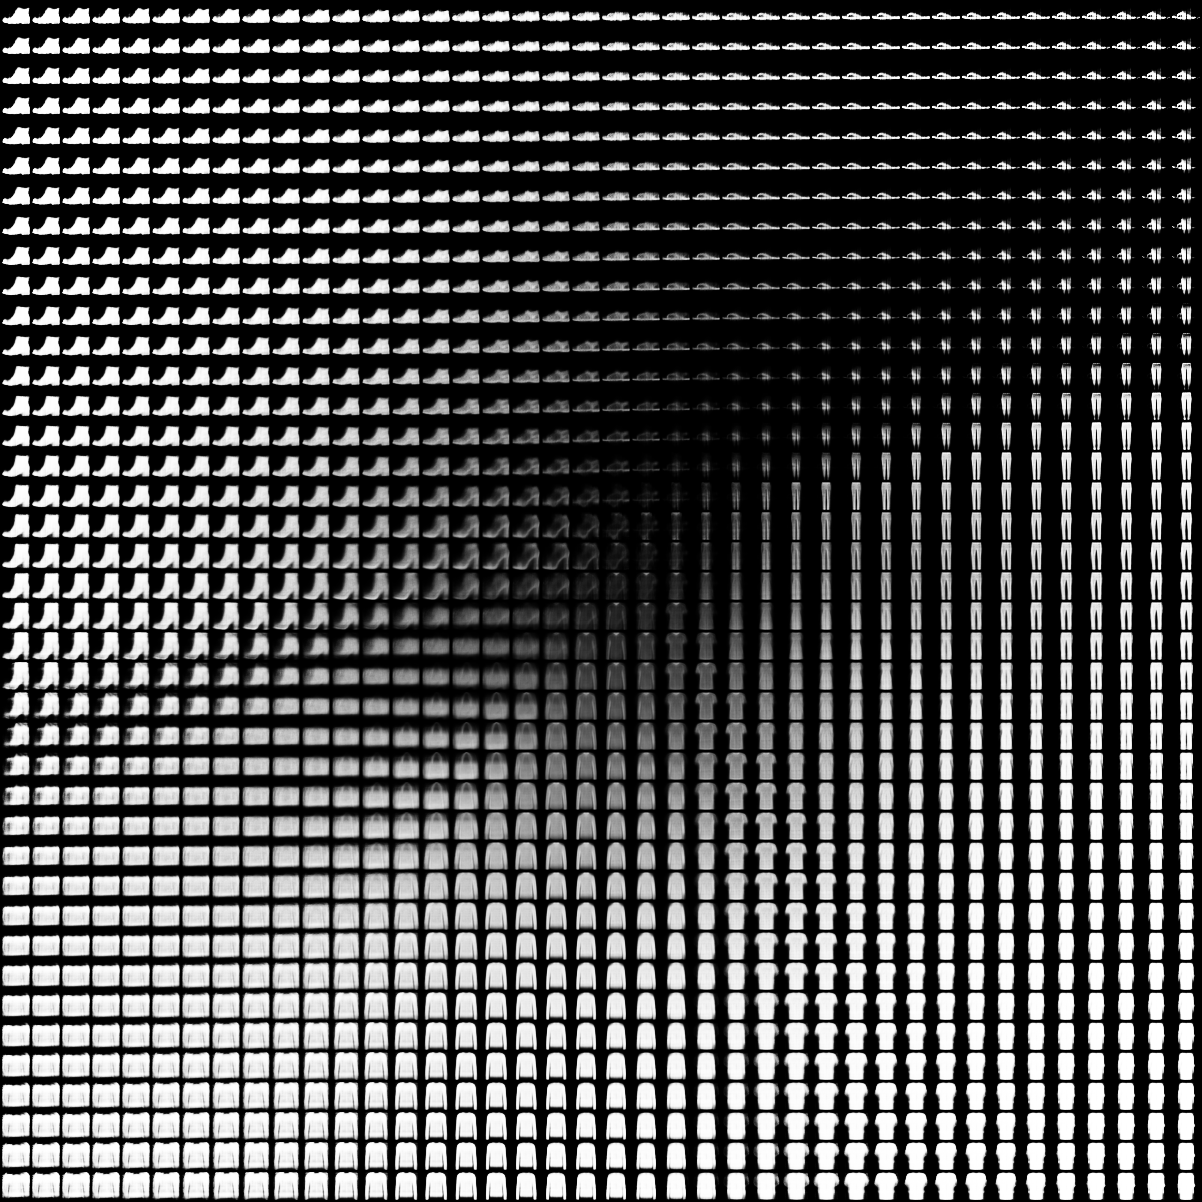

In [112]:
Image(filename='results/fashion-mnist/savedmodel_sample_sneakers.png') 